## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 3
#### Oscar Maffei

***
## Estimación espectral


In [122]:
## Inicialización del Notebook del TP3


import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal as sg
import spectrum as sp
from pandas import DataFrame
from IPython.display import HTML


fs = 1000 # Hz

# Insertar aquí el código para inicializar tu notebook
########################################################

def Periodograma(x):
    #de Hayes cap 8.2.1 Fig 8.1
    #f=abs(np.fft.fft(x,1024))
    #p=(f**2)/len(x)
    #p[0]=p[1]
    #return p
    p=sg.periodogram(x,fs,nfft=10*len(x))
    return p[1]

def PeriodogramaB(x,k=5):
    p=sg.welch(x,fs,window='bartlett',nperseg=k,noverlap=None,nfft=10*len(x))
    return p[1] 


def PeriodogramaM(x):
    w=np.hamming(len(x))
    s=x*w/max(w)
    p=Periodograma(s)
    return p

def PeriodogramaW(x,L,ovr=0):
    p=sg.welch(x,fs,window='hann',nperseg=L,noverlap=ovr,nfft=10*len(x))
    return p[1]  


<div class="alert alert-block alert-info">
<b>1)</b> Compruebe experimentalmente las propiedades de sesgo y varianza del periodograma.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar una señal aleatoria con valores normalmente distribuidos de media nula y varianza **NO** unitaria, es decir $ x \sim \mathcal{N}(\mu=0,\sigma^2=2)$

</div>

Es decir, que el periodograma es un estimador de la densidad de potencia espectral (Ver Hayes 8.2.2):

$$ \hat{P_P}(e^{\frac{2\pi·k·f_S}{N}}) = \hat{P_P}(k) = \frac{1}{N}· \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza constante y **NO** depende de N.

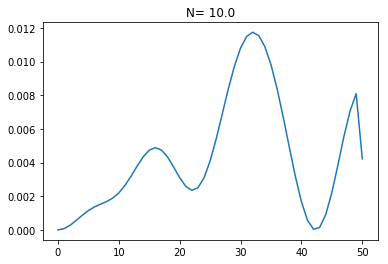

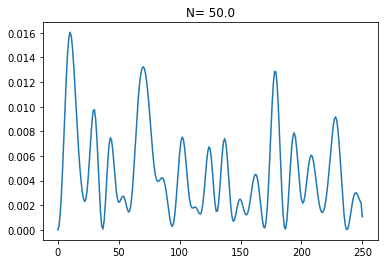

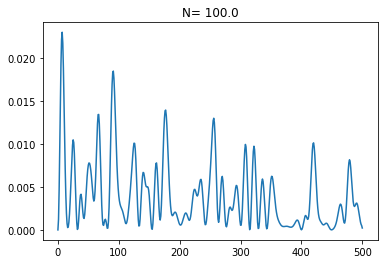

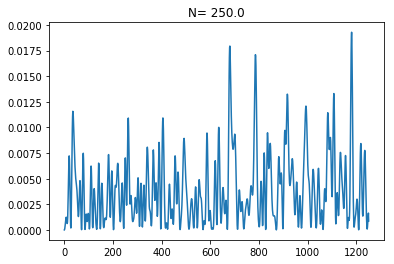

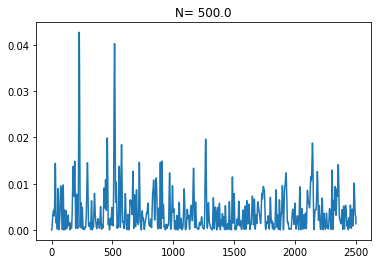

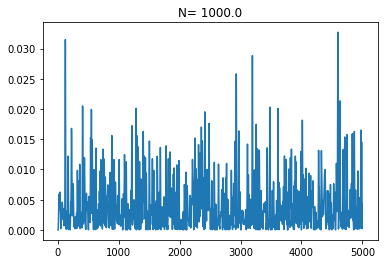

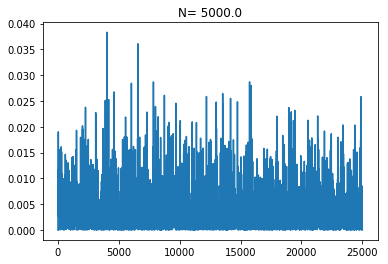

In [123]:
# Simular para los siguientes tamaños de señal
N = np.array([10, 50, 100, 250, 500, 1000, 5000], dtype=np.float)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

N=[10,50,100,250,500,1000,5000]
fs=1000

#Ruido Normal de varianza 2
sn= [np.random.normal(0,np.sqrt(2),n).flatten() for n in N]

#Periodograma
Ps=[Periodograma(s) for s in sn]

data= [[np.mean(p),np.var(p)] for p in Ps]

for p in Ps:
    plt.figure()
    plt.title('N= ' + str((len(p)-1)/5))
    plt.plot(p)
 



In [124]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = data 
#                   ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#                 ]
df = DataFrame(tus_resultados, columns=['$s_P$', '$v_P$'],
               index=N)
HTML(df.to_html())


,$s_P$,$v_P$
10,0.004313,0.000012
50,0.004656,0.000013
100,0.004020,0.000016
250,0.003918,0.000011
500,0.003935,0.000020
1000,0.004251,0.000018
5000,0.004059,0.000017


<div class="alert alert-block alert-info">
<b>2)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Bartlett.

</div>

Es decir, que el periodograma de Bartlett es un estimador de la densidad de potencia espectral que promedia K bloques disjuntos de las N muestras de una señal $x$ (Ver Hayes 8.2.4):

$$ \hat{P_B}(k) = \frac{1}{N}· \sum^{K-1}_{i=0} \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente a medida que aumenta K.
 + tiene una resolución espectral K veces menor

In [125]:
# Simular para los siguientes tamaños de señal
N = np.array([10, 50, 100, 250, 500, 1000, 5000], dtype=np.float)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

N=[10,50,100,250,500,1000,5000]
fs=1000


#Ruido Normal de varianza 2
sn= [np.random.normal(0,np.sqrt(2),n).flatten() for n in N]

#Periodograma de Bartlett
Pb=[PeriodogramaB(s) for s in sn]
Pb=[p/max(p) for p in Pb]

data= [[p.mean(),p.var()] for p in Pb]



In [126]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = data #[ 
#                   ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#                  ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#                 ]
df = DataFrame(tus_resultados, columns=['$s_B$', '$v_B$'],
               index=N)
HTML(df.to_html())


,$s_B$,$v_B$
10,0.605919,0.078584
50,0.795023,0.066162
100,0.750072,0.052570
250,0.778763,0.065636
500,0.718289,0.054343
1000,0.795630,0.065335
5000,0.790937,0.062019


<div class="alert alert-block alert-info">
<b>3)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Welch.

</div>

Es decir, que el periodograma de Welch es un estimador de la densidad de potencia espectral que promedia K bloques ventaneados por $w(n)$, posiblemente solapados de las N muestras de una señal $x$ (Ver Hayes 8.2.5):

$$ \hat{P_W}(k) = \frac{1}{K·L·U}· \sum^{K-1}_{i=0} \Bigg\vert \sum^{L-1}_{n=0}  x(n+i·D) · w(n) · e^{-j2\pi·k·n·\frac{f_S}{N}} \Bigg\vert^2   $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente, a medida que se promedian más bloques de señal.
 + tiene una resolución espectral inversamente proporcional al tamaño del bloque.

In [127]:
# Simular para los siguientes tamaños de señal
N = np.array([10, 50, 100, 250, 500, 1000, 5000], dtype=np.float)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

N=[10,50,100,250,500,1000,5000]
fs=1000
#Ruido Normal de varianza 2
sn= [np.random.normal(0,np.sqrt(2),n).flatten() for n in N]

#Pw =[ sg.welch(s, fs=fs, nfft=len(s), window='hanning', nperseg=int(np.round(len(s)/3)) ) for s in sn]
Pw=[PeriodogramaW(s,2,0.2) for s in sn]

data=[[p.mean(),p.var()] for p in Pw]


In [128]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = data #[ 
#                   ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#                 ]
df = DataFrame(tus_resultados, columns=['$s_W$', '$v_W$'],
               index=N)
HTML(df.to_html())


,$s_W$,$v_W$
10,0.003533,1.223004e-07
50,0.001492,4.433576e-09
100,0.001880,3.525785e-09
250,0.001804,1.300110e-09
500,0.001808,6.533217e-10
1000,0.002022,4.085747e-10
5000,0.002087,8.709758e-11


<div class="alert alert-block alert-info">
<b>4)</b> Evalue el siguiente estimador de frecuencia de una senoidal contaminada por ruido incorrelado.

</div>

Para una señal $ x(k) = a_1 · \mathop{sen}(\Omega_1·k) + n(k)$

siendo 

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y las variables aleatorias definidas por

  $f_r \sim \mathcal{U}(-\frac{1}{2}, \, \frac{1}{2}) $

  $n \sim \mathcal{N}(0, \, \sigma ^2) $
  
Evalúe el siguiente estimador de $\Omega_1$

  $\hat{\Omega}_1^W = \mathop{arg\ max}_f \{ \hat{P_W} \} $
  
basado en el periodograma de Welch evaluado en **3)**. Del mismo modo, evalúe otro estimador de la PSD para crear otro estimador de $\Omega_1$

  $\hat{\Omega}_1^X = \mathop{arg\ max}_f \{ \hat{P_X} \} $

Considere 200 realizaciones de 1000 muestras para cada experimento. Cada realización debe tener un SNR tal que el pico de la senoidal esté 3 y 10 db por encima del *piso* de ruido impuesto por $n(k)$.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar el módulo de análisis espectral **Spectrum** donde encontrará la mayoría de los métodos descriptos en el Capítulo 8 del libro de Hayes.

</div>

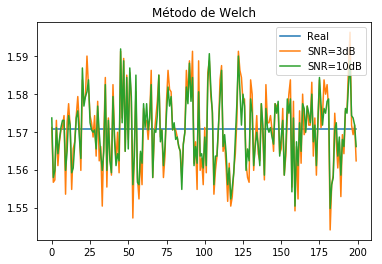

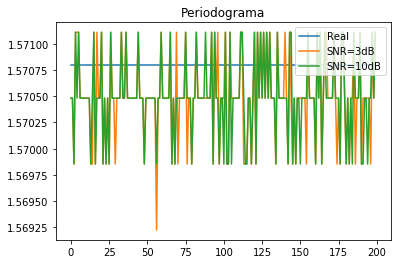

In [135]:
# Simular para los siguientes tamaños de señal

R = 200 # realizaciones

N = 1000 # Muestras

# Obtené los valores XX para que cumplas con el enunciado
#SNR = np.array([ XX, XX ], dtype=np.float)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################
#Por Welch
k=np.linspace(0,N-1,N)
Wn=np.pi * np.ones(R)/2
Ww3=np.zeros(R)
Ww10=np.zeros(R)

fr=np.random.uniform(-0.5,0.5,N)
W=np.pi/2 + fr*2*np.pi/N 
n=0.25*np.random.normal(0,np.sqrt(2),N)

s3=1.4142 * np.sin(W * k)
s10=3.16 * np.sin(W * k) 


for i in range(R):
    fr=np.random.uniform(-0.5,0.5,N)
    n=0.25*np.random.normal(0,2,N)
    W=np.pi/2 + fr*2*np.pi/N 
    s3=1.4142 * np.sin(W * k) + n
    s10=3.16 * np.sin(W * k) + n
    #Pw=sg.welch(s3, fs=fs, nfft=N,nperseg=int(np.round(N/3)))
    Pw=PeriodogramaW(s3,20,5)
    Ww3[i]= np.pi * np.argmax(Pw)/(len(Pw))
    #Pw=sg.welch(s10, fs=fs, nfft=N,nperseg=int(np.round(N/3))) 
    Pw=PeriodogramaW(s10,20,5)
    
    Ww10[i]=np.pi * np.argmax(Pw)/(len(Pw))

mw3=Ww3.mean()
mw10=Ww10.mean()
    
#Por Bartlett
Ww=np.transpose(np.vstack([Wn,Ww3,Ww10]))
plt.title("Método de Welch")
line_hdls= plt.plot(Ww)
axes_hdl = plt.gca()
axes_hdl.legend(line_hdls, ['Real','SNR=3dB','SNR=10dB'], loc='upper right'  )

for i in range(R):
    fr=np.random.uniform(-0.5,0.5,N)
    n=0.25*np.random.normal(0,2,N)
    W=np.pi/2 + fr*2*np.pi/N 
    s3=1.4142 * np.sin(W * k) + n
    s10=3.16 * np.sin(W * k) + n
    Pw=Periodograma(s3)
    Ww3[i]=np.pi * np.argmax(Pw)/(len(Pw))
    Pw=Periodograma(s10) 
    Ww10[i]=np.pi * np.argmax(Pw)/(len(Pw))

m3=Ww3.mean()
m10=Ww10.mean()

Ww=np.transpose(np.vstack([Wn,Ww3,Ww10]))
plt.figure(2)
plt.title("Periodograma")
line_hdls= plt.plot(Ww)
axes_hdl = plt.gca()
axes_hdl.legend(line_hdls, ['Real','SNR=3dB','SNR=10dB'], loc='upper right'  )


   a) ¿Qué estimador ha elegido? Explique brevemente los fundamentos principales y el enfoque del método elegido.


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> El estimador elegido fue el Periodograma debido a que su resolución espectral es mayor que los métodos de Bartlett y Welch
</div>

   b) ¿Qué indicador considera que sería apropiado para poder comparar el rendimiento de ambos estimadores $i_j$?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Como lo que se busca es el valor de la frecuencia un buen estimador del rendimiento sería la media
</div>

In [136]:

#######################################
# Tu simulación que genere resultados #
#######################################

# Una vez definido tu indicador de performance, calculalo y comparalo para las situaciones pedidas.
tus_resultados = [ 
                   [mw3, m3], # <-- acá debería haber numeritos :)
                   [mw10, m10] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$i_W$', '$i_X$'],
               index=[  
                        '3 dB',
                        '10 dB'
                     ])
HTML(df.to_html())


,$i_W$,$i_X$
3 dB,1.570353,1.570495
10 dB,1.570328,1.570495
